# Задание 2

### 1. Одномерная линейная регрессия.
Вывести формулу линейной регрессии для одномерного случая. Дана
выборка $\{x_i,y_i\}_{i=1}^N$, минимизируя среднеквадратичную ошибку определить
коэффициенты линейной регрессии: $a(x)=w_0+w_1x$.

### 2. Оптимальный шаг градиентного спуска. 
Рассмотрим задачу обучения линейной регрессии:

$$
Q(\vec{w})=(X\vec{w}-\vec{y})^T(X\vec{w}-\vec{y}) \to \min_{w},
$$
и будем решать ее с помощью градиентного спуска. Допустим, мы находимся на некоторой итерации $k$, и хотим выполнить очередной шаг:
$$
\vec{w}^{(k)}=\vec{w}^{(k-1)}-\eta \nabla_w Q(\vec{w}^{(k-1)}).
$$
При известных $ \vec{y}, X,\vec{w}^{(k-1)}$, определите длину шага $\eta$, при которой уменьшение значение функционала будет наибольшим, т.е.: 

$$
Q(\vec{w}^{(k-1)}-\eta \nabla_w Q(\vec{w}^{(k-1)})) \to \min_{\eta}.
$$

### Найдем минимум следующего выпуклого функционала
$$Q(w_0, w_1) = \sum_{i=1}^N(w_0 + w_1x_i -y_i)^2$$

Ищем стационарную точку:

$$\begin{cases}
\frac{\partial Q}{\partial w_0} = 2\sum_{i=1}^N(w_0 + w_1x_i - y_i) = 0\\
\frac{\partial Q}{\partial w_1} = 2\sum_{i=1}^Nx_i(w_0 + w_1x_i - y_i) = 0
\end{cases}$$

Из первого уравнения:

$$w_0 = \overline{y}-w_1\overline{x}$$

Подставим во второе, получим:

$$w_1 = \frac{\overline{xy}-\overline{y}\overline{x}}{\overline{x^2}-\overline{x}^2}$$

Так как функционал выпуклый, то точка $(w_0, w_1)$ является минимумом

In [275]:
import numpy as np
import pandas as pd
from random import sample 

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV


### 3. Стохастический градиентный спуск 
Напишите функцию стохастического градиентного спуска. 
Функция использует для оценки градиента всего функционала ошибки значение градиента, вычисленного по подвыборке размера batch_size=10. Визуализируйте траекторию, длина шага $\eta=1$.

In [276]:
np.random.seed(17)
n_features = 2
n_objects = 300
w_true = np.array([1.0,1.0])
X = np.random.uniform(-5,5, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0,1, (n_objects))

In [277]:
def stoсhastic_grad_descent(X, y, w_0, step_size, num_steps, batch_size=10):
    w = w_0.copy()
    w_list=[]
    for i in range(num_steps):
        indices = np.random.choice(len(X), batch_size)
        y_batch = y[indices]
        X_batch = X[indices, :]
        
        w_list.append(w)
        w =w- 2 * step_size * np.dot(X_batch.T, np.dot(X_batch, w) - y_batch)/Y.shape[0]
    return w_list

In [278]:
num_steps = 10
step_size = 1
w_0 = np.array([0,0])
w_list=stoсhastic_grad_descent(X, Y, w_0,step_size, num_steps, batch_size=10)
w_list = np.array(w_list)

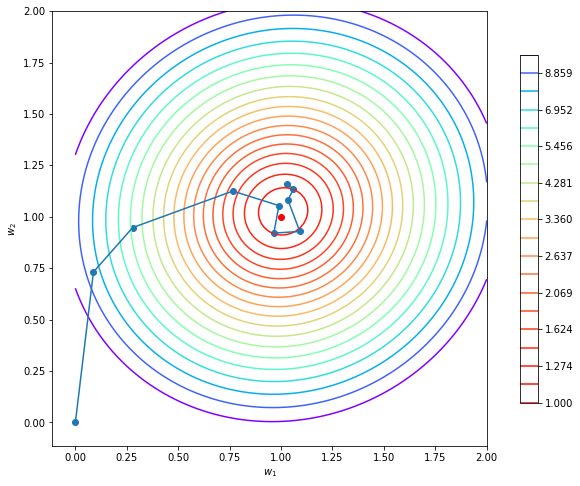

In [279]:
# compute level set
A, B = np.meshgrid(np.linspace(0, 2, 100), np.linspace(0, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))


plt.figure(figsize=(12, 8))
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

### 4. Линейная регрессия на данных. Оценка важности признаков.  

In [280]:
from sklearn.datasets import load_boston
data = load_boston()
feature_names = data.feature_names
print(feature_names)
X = data.data
y = data.target
N, d = X.shape
print( N, d)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
506 13


#### 4.1 Напишите функцию, которая вычисляет ошибку RMSE (root mean square error):
$$ RMSE(a,\mathbb X)=\sqrt{\frac{\sum_{i=1}^{N}(a(x_i)-y_i)^2}{N}}.$$


In [281]:
def rmse(y_pred, y):
    err = np.sqrt(np.sum((y_pred - y) ** 2)/len(y))
    
    return err

Разбейте выборку на обучающую и тестовую в соотношении 7:3. Проведите стандартизацию признаков, постройте линейную регресcию и ответьте на следующие вопросы. 
#### 4.2. Какова ошибка RMSE  линейной регрессии на обучающей  выборке?

#### 4.3. Какова ошибка RMSE линейной регрессии на тестовой выборке?

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regr = LinearRegression().fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print("RMSE on train sample: {0}".format(rmse(y_train_pred, y_train)))
print("RMSE on test sample: {0}".format(rmse(y_test_pred, y_test)))

RMSE on train sample: 4.748208239685937
RMSE on test sample: 4.6386899261728205


####  4.4. Распределение ошибок на обучающей выборке. 
Посчитайте отклонение на каждом обучающем объекте: 
$$\delta^{j}_{train}=y_{pred}^{j}-y_{train}^{j},$$
и постройте распределение этих отклонений. Какой статистике подчиняется полученное распределение?

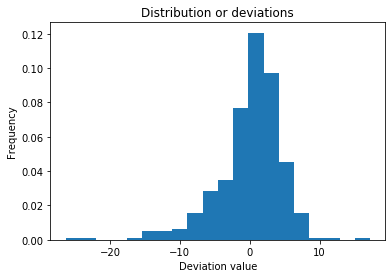

In [283]:
delta_train = y_train_pred - y_train

plt.hist(delta_train, density = True, bins = 20)
plt.title("Distribution or deviations")
plt.xlabel("Deviation value")
plt.ylabel("Frequency");

Полученное распределение напоминает нормальное распределение с нулевым смещением 


#### 4.5. Постройте диаграмму важности признаков. 
Используйте plt.bar, отсортируйте признаки по важности (модуль соответствующего коэффициента в линейной регрессии) и постройте диаграмму.  Какой признак наиболее важный?

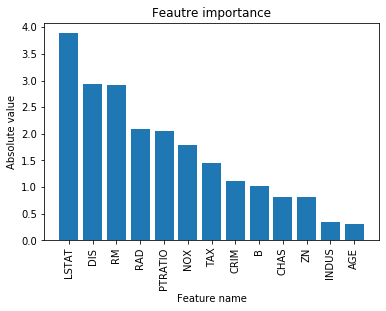

In [284]:
w = abs(regr.coef_)
names = feature_names

features = list(zip(names, w))
features.sort(key=lambda p: p[1], reverse=True)
features = np.array(features)

plt.bar(features[:,0], np.array(features[:,1], dtype=float))
plt.xticks(rotation=90)
plt.title("Feautre importance")
plt.xlabel("Feature name")
plt.ylabel("Absolute value");

### 5. Отбор признаков в Lasso регрессии. 
Рассмотрим Lasso регрессию с различным параметром регуляризации $\alpha \in [10^{-3},10^3]$. Посмотрите, какое количество коэффициентов зануляется в линейной модели. Воспользуйтесь кроссвалидацией (например, ShuffleSplit), чтобы построить несколько алгоритмов для одного и того же значения  $\alpha$, а затем взять среднее число ненулевых коэффициентов по этим алгоритмам.  Постройте график зависимости (логарифмический масштаб по оси абсцис) среднего числа ненулевых коэффициентов от коэффицента регуляризации $\alpha$.

P.S. Обратите внимание на необходимость стандартизации при каждом разбиении выборки.  

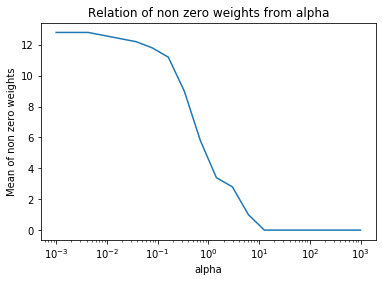

In [285]:
alphas = np.logspace(-3, 3, 20)
mean_zero_count = []

for alpha in alphas:
    zero_count = []
    for train, test in ShuffleSplit(n_splits=5, test_size=0.3, random_state=23).split(X):
        scaler = StandardScaler()
        scaler.fit(X[train])
        X_cv_train = scaler.transform(X[train])

        lasso = Lasso(alpha = alpha).fit(X_cv_train, y[train])
        zero_count.append(np.sum(lasso.coef_ != 0))
        
    mean_zero_count.append(np.mean(zero_count))
    
plt.plot(alphas, mean_zero_count)
plt.xlabel("alpha")
plt.ylabel("Mean of non zero weights")
plt.xscale('log')
plt.title("Relation of non zero weights from alpha");

### 6. Подбор параметров. 
#### 6.1. С помощью GridSearch определите параметры регуляризации для Ridge и Лассо моделей. 

In [286]:
grid_searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], cv=5)
grid_searcher.fit(X_train, y_train)

lasso_searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], cv=5)
lasso_searcher.fit(X_train, y_train)

print("Best params for Ridge model {}".format(grid_searcher.best_params_))
print("Best params for Lasso model {}".format(lasso_searcher.best_params_))

Best params for Ridge model {'alpha': 26.366508987303554}
Best params for Lasso model {'alpha': 0.001}


C:\Users\ische\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### 6.2. Постройте модели с найденными наилучшими параметрами регуляризации на обучающей выборке из пункта 4. Какова ошибка RMSE на обучающей выборке и тестовой?

In [287]:
best_ridge = Ridge(alpha = grid_searcher.best_params_["alpha"]).fit(X_train, y_train)
best_lasso = Lasso(alpha = lasso_searcher.best_params_["alpha"]).fit(X_train, y_train)

print("RMSE with Lasso model on test sample: {}".format(rmse(y_test, best_lasso.predict(X_test))))
print("RMSE with Ridge model on test sample: {}".format(rmse(y_test, best_ridge.predict(X_test))))

print("RMSE with Lasso model on train sample: {}".format(rmse(y_train, best_lasso.predict(X_train))))
print("RMSE with Ridge model on train sample: {}".format(rmse(y_train, best_ridge.predict(X_train))))

RMSE with Lasso model on test sample: 4.63912822828735
RMSE with Ridge model on test sample: 4.711225295897613
RMSE with Lasso model on train sample: 4.748215906554991
RMSE with Ridge model on train sample: 4.792686477626628
